In [109]:
# %matplotlib inline
# %matplotlib notebook
import tqdm, copy
import random, os
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt
from collections import defaultdict
from overcooked_ai_py.utils import save_pickle
from human_aware_rl.utils import set_global_seed
from human_aware_rl.human.process_dataframes import *
# from human_aware_rl.static import *
import pickle as pkl

set_global_seed(1884)
import ast
import json

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import os
from ast import literal_eval
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from scipy import stats



In [1]:
def import_cleaned_data(filename):
    

    with open(filename,'rb') as file:
        data = pkl.load(file)

    return data




In [4]:
filename = '../data/human/anonymized/humanai_performance.pickle'
humanai_performance = import_cleaned_data(filename)



In [91]:
humanai_performance


defaultdict(dict,
            {'random0': {'ppo_sp_base_0': (18.181818181818183,
               5.426927325415538),
              'ppo_sp_base_1': (75.55555555555556, 24.701232593382326),
              'ppo_bc_base_0': (2.0, 1.8973665961010275),
              'ppo_bc_base_1': (76.66666666666667, 12.838022231434826),
              'pbt_base_0': (33.333333333333336, 8.31479419283098),
              'pbt_base_1': (17.77777777777778, 12.350616296691163),
              'ppo_sp_no_advers_0': (18.181818181818183, 5.426927325415538),
              'ppo_sp_no_advers_1': (75.55555555555556, 24.701232593382326),
              'ppo_bc_no_advers_0': (2.0, 1.8973665961010275),
              'ppo_bc_no_advers_1': (76.66666666666667, 12.838022231434826),
              'pbt_no_advers_0': (37.5, 8.244316223920574),
              'pbt_no_advers_1': (17.77777777777778, 12.350616296691163)},
             'random3': {'ppo_sp_base_0': (54.54545454545455,
               10.314367445833188),
              'ppo

In [3]:
filename = '../data/human/anonymized/filtered_humanai_trials.pkl'
filtered_humanai_trials = import_cleaned_data(filename)


In [96]:
bc_trials = filtered_humanai_trials[(filtered_humanai_trials['model_type'] == 'ppo_bc')&
                                   (filtered_humanai_trials['layout_name'] == 'random0')]
worker_ids = bc_trials['workerid_num'].unique()
print('worker_ids', worker_ids)
print(bc_trials.columns)

worker_ids [31 30 36 37 29 20 19 34 32 25 35 21 33 23 27 28]
Index(['action', 'cur_gameloop', 'datetime', 'indexOf', 'joint_action',
       'layout', 'layout_name', 'model_type', 'next_state', 'player_index',
       'reward', 'round_num', 'round_type', 'score', 'state', 'template',
       'time_elapsed', 'time_left', 'viewTime', 'reward_norm',
       'cur_gameloop_total', 'reward_norm_total', 'workerid_num'],
      dtype='object')


In [99]:
filtered_humanai_trials['player_index']

877       0
878       0
879       0
880       0
881       0
         ..
137365    0
137366    0
137367    0
137368    0
137369    0
Name: player_index, Length: 90889, dtype: int64

In [115]:
bc_trials = filtered_humanai_trials[(filtered_humanai_trials['model_type'] == 'ppo_bc')&
                                   (filtered_humanai_trials['layout_name'] == 'random0')&
                                   (filtered_humanai_trials['player_index'] == 0)]
worker_ids = bc_trials['workerid_num'].unique()
print('worker_ids', worker_ids)

scores = [bc_trials[bc_trials['workerid_num']==trial_no]['score'].to_numpy()[-1] for trial_no in worker_ids]*4
scores = [elem*4 for elem in scores]
print(scores)
print('mean = ', np.mean(scores))
print('se = ',stats.sem(scores, ddof=0))
print('std = ', np.std(scores))


worker_ids [31 37 29 19 34 25 35 33 23 27]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0]
mean =  2.0
se =  0.9486832980505138
std =  6.0


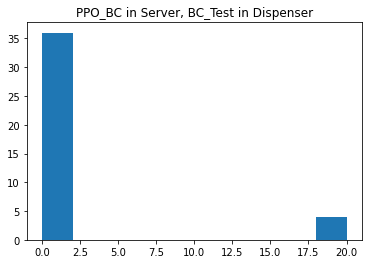

In [116]:
plt.hist(scores)
plt.title("PPO_BC in Server, BC_Test in Dispenser")
plt.show()

In [117]:
bc_trials = filtered_humanai_trials[(filtered_humanai_trials['model_type'] == 'ppo_bc')&
                                   (filtered_humanai_trials['layout_name'] == 'random0')&
                                   (filtered_humanai_trials['player_index'] == 1)]
worker_ids = bc_trials['workerid_num'].unique()
print('worker_ids', worker_ids)

scores = [bc_trials[bc_trials['workerid_num']==trial_no]['score'].to_numpy()[-1] for trial_no in worker_ids]
scores = [elem*4 for elem in scores]
print(scores)
print('mean = ', np.mean(scores))
print('se = ',stats.sem(scores, ddof=0))
print('std = ', np.std(scores))


worker_ids [30 36 20 32 21 28]
[80.0, 20.0, 120.0, 60.0, 100.0, 80.0]
mean =  76.66666666666667
se =  12.838022231434827
std =  31.446603773522014


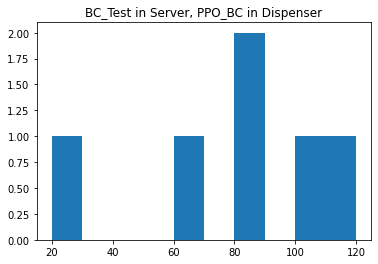

In [118]:
plt.hist(scores)
plt.title("BC_Test in Server, PPO_BC in Dispenser")
plt.show()

In [60]:
trial_no = 31
bc_player_trial = bc_trials[bc_trials['workerid_num']==trial_no]
joint_actions_in_trial = bc_player_trial['joint_action'].to_numpy()
human_index = bc_player_trial['player_index'].unique()[0]
time_elapsed_in_trial = bc_player_trial['time_elapsed'].to_numpy()
scores = bc_player_trial['score'].to_numpy()
final_score = scores[-1]

if human_index == 0:
    robot_index = 1
else:
    robot_index = 0

human_actions = [elem[human_index] for elem in joint_actions_in_trial]
robot_actions = [elem[robot_index] for elem in joint_actions_in_trial]

state_list = bc_player_trial['state'].to_numpy()

next_state_list = bc_player_trial['next_state'].to_numpy()

# Player at index 0 = Server (Right side, technically considered player 2)
# Player at index 1 = Dispenser (Left side, technically considered player 1)



In [64]:
print(state_list[0])
print(next_state_list[0])
print(human_index, human_actions[0])
print(robot_index, robot_actions[0])


{'players': [{'position': [3, 1], 'orientation': [0, -1]}, {'position': [1, 2], 'orientation': [0, -1]}], 'objects': {}, 'pot_explosion': False, 'order_list': ['onion']}
{'players': [{'position': [3, 1], 'orientation': [0, -1]}, {'position': [1, 1], 'orientation': [0, -1]}], 'objects': {}, 'pot_explosion': False, 'order_list': ['onion']}
0 [0, 0]
1 [0, -1]


In [69]:
# NORTH = (0, -1)
# SOUTH = (0, 1)
# EAST  = (1, 0)
# WEST  = (-1, 0)
# STAY = (0,0)
# INTERACT


In [68]:
n_human_fails = 0
n_robot_fails = 0
for i in range(len(state_list)-1):
    curr_human_state = state_list[i]['players'][human_index]
    curr_robot_state = state_list[i]['players'][robot_index]
    next_human_state = next_state_list[i]['players'][human_index]
    next_robot_state = next_state_list[i]['players'][robot_index]
    
    check_next_human_state = state_list[i+1]['players'][human_index]
    check_next_robot_state = state_list[i+1]['players'][robot_index]
    assert next_human_state == check_next_human_state
    assert next_robot_state == check_next_robot_state
    
    human_act = human_actions[i]
    robot_act = robot_actions[i]
    
    if human_act != [0,0]:
        
        if next_human_state == curr_human_state:
            n_human_fails += 1
            print('problem with HUMAN')
            print('curr_human_state', curr_human_state)
            print('next_human_state', next_human_state)
            print('human_act', human_act)
            print()
    if robot_act != [0,0]:
        
        if next_robot_state == curr_robot_state:
            n_robot_fails += 1
            print('problem with ROBOT')
            print('curr_robot_state', curr_robot_state)
            print('next_robot_state', next_robot_state)
            print('robot_act', robot_act)
            print()

print('n_human_fails = ', n_human_fails)
print('n_robot_fails = ', n_robot_fails)



problem with ROBOT
curr_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
next_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
robot_act INTERACT

problem with ROBOT
curr_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
next_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
robot_act INTERACT

problem with ROBOT
curr_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
next_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
robot_act INTERACT

problem with ROBOT
curr_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
next_robot_state {'position': [1, 1], 'orientation':

robot_act INTERACT

problem with ROBOT
curr_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
next_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
robot_act INTERACT

problem with ROBOT
curr_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
next_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
robot_act INTERACT

problem with ROBOT
curr_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
next_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
robot_act INTERACT

problem with ROBOT
curr_robot_state {'position': [1, 1], 'orientation': [-1, 0], 'held_object': {'position': [1, 1], 'name': 'onion'}}
next_robot_state {'position': [1

# Count Active Time

In [43]:
def count_actions(actions_list, time_elapsed):
    num_actions = 0
    num_stationary = 0
    time_actions = 0
    time_stationary = 0
    for i in range(1, len(actions_list)):
        step_time = time_elapsed[i] - time_elapsed[i-1]
        if actions_list[i] == [0,0]:
            num_stationary += 1
            time_stationary += step_time
        else:
            num_actions += 1
            time_actions += step_time
    return num_actions, num_stationary, time_actions, time_stationary
    

In [44]:
bc_trials = filtered_humanai_trials[(filtered_humanai_trials['model_type'] == 'ppo_bc')&
                                   (filtered_humanai_trials['layout_name'] == 'random0')]
worker_ids = bc_trials['workerid_num'].unique()

work_distribution_data = {}

for trial_no in worker_ids:
    work_distribution_data[trial_no] = {}
    bc_player_trial = bc_trials[bc_trials['workerid_num']==trial_no]
    joint_actions_in_trial = bc_player_trial['joint_action'].to_numpy()
    human_index = bc_player_trial['player_index'].unique()[0]
    time_elapsed_in_trial = bc_player_trial['time_elapsed'].to_numpy()
    scores = bc_player_trial['score'].to_numpy()
    final_score = scores[-1]

    if human_index == 0:
        robot_index = 1
    else:
        robot_index = 0

    human_actions = [elem[human_index] for elem in joint_actions_in_trial]
    robot_actions = [elem[robot_index] for elem in joint_actions_in_trial]


    h_num_actions, h_num_stationary, h_time_actions, h_time_stationary = count_actions(human_actions, time_elapsed_in_trial)
    r_num_actions, r_num_stationary, r_time_actions, r_time_stationary = count_actions(robot_actions, time_elapsed_in_trial)

    work_distribution_data[trial_no]['score'] = final_score
    work_distribution_data[trial_no]['h_num_actions'] = h_num_actions
    work_distribution_data[trial_no]['h_num_stationary'] = h_num_stationary
    work_distribution_data[trial_no]['h_time_actions'] = h_time_actions
    work_distribution_data[trial_no]['h_time_stationary'] = h_time_stationary
    work_distribution_data[trial_no]['r_num_actions'] = r_num_actions
    work_distribution_data[trial_no]['r_num_stationary'] = r_num_stationary
    work_distribution_data[trial_no]['r_time_actions'] = r_time_actions
    work_distribution_data[trial_no]['r_time_stationary'] = r_time_stationary
    


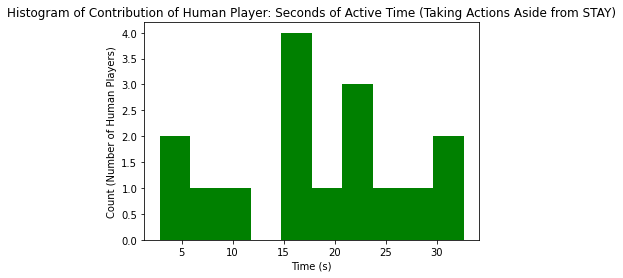

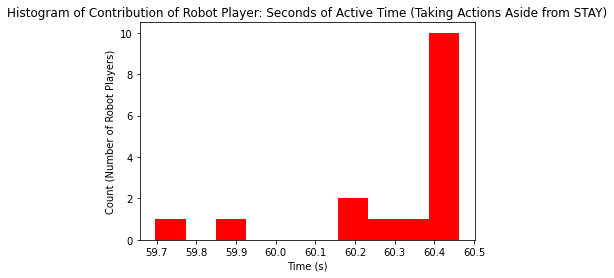

In [59]:
h_time_actions = [work_distribution_data[trial_no]['h_time_actions'] for trial_no in work_distribution_data]
r_time_actions = [work_distribution_data[trial_no]['r_time_actions'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()

plt.hist(h_time_actions, alpha=1, bins=10, color='g')
plt.title("Histogram of Contribution of Human Player: Seconds of Active Time (Taking Actions Aside from STAY)")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Human Players)")
# plt.xlim(0,61)
plt.show()

plt.hist(r_time_actions, alpha=1, bins=10, color='r')
plt.title("Histogram of Contribution of Robot Player: Seconds of Active Time (Taking Actions Aside from STAY)")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Robot Players)")
# plt.xlim(0,61)
plt.show()


0.0

In [47]:
work_distribution_data

{31: {'score': 0.0,
  'h_num_actions': 33,
  'h_num_stationary': 369,
  'h_time_actions': 4.8919999999999995,
  'h_time_stationary': 55.543,
  'r_num_actions': 402,
  'r_num_stationary': 0,
  'r_time_actions': 60.435,
  'r_time_stationary': 0},
 30: {'score': 20.0,
  'h_num_actions': 154,
  'h_num_stationary': 249,
  'h_time_actions': 23.032000000000004,
  'h_time_stationary': 37.41799999999999,
  'r_num_actions': 403,
  'r_num_stationary': 0,
  'r_time_actions': 60.449999999999996,
  'r_time_stationary': 0},
 36: {'score': 5.0,
  'h_num_actions': 182,
  'h_num_stationary': 221,
  'h_time_actions': 27.34900000000004,
  'h_time_stationary': 33.097999999999956,
  'r_num_actions': 403,
  'r_num_stationary': 0,
  'r_time_actions': 60.447,
  'r_time_stationary': 0},
 37: {'score': 0.0,
  'h_num_actions': 19,
  'h_num_stationary': 384,
  'h_time_actions': 2.8469999999999893,
  'h_time_stationary': 57.59500000000001,
  'r_num_actions': 403,
  'r_num_stationary': 0,
  'r_time_actions': 60.442,

# Check Actual Ability

In [71]:
def check_fails(state_list, next_state_list, human_index, robot_index, human_actions, robot_actions):
    n_human_fails = 0
    n_robot_fails = 0
    for i in range(len(state_list)-1):
        curr_human_state = state_list[i]['players'][human_index]
        curr_robot_state = state_list[i]['players'][robot_index]
        next_human_state = next_state_list[i]['players'][human_index]
        next_robot_state = next_state_list[i]['players'][robot_index]

        check_next_human_state = state_list[i+1]['players'][human_index]
        check_next_robot_state = state_list[i+1]['players'][robot_index]
        assert next_human_state == check_next_human_state
        assert next_robot_state == check_next_robot_state

        human_act = human_actions[i]
        robot_act = robot_actions[i]

        if human_act != [0,0]:

            if next_human_state == curr_human_state:
                n_human_fails += 1
    #             print('problem with HUMAN')
    #             print('curr_human_state', curr_human_state)
    #             print('next_human_state', next_human_state)
    #             print('human_act', human_act)
    #             print()
        if robot_act != [0,0]:

            if next_robot_state == curr_robot_state:
                n_robot_fails += 1
    #             print('problem with ROBOT')
    #             print('curr_robot_state', curr_robot_state)
    #             print('next_robot_state', next_robot_state)
    #             print('robot_act', robot_act)
    #             print()

    # print('n_human_fails = ', n_human_fails)
    # print('n_robot_fails = ', n_robot_fails)
    return n_human_fails, n_robot_fails



In [72]:
bc_trials = filtered_humanai_trials[(filtered_humanai_trials['model_type'] == 'ppo_bc')&
                                   (filtered_humanai_trials['layout_name'] == 'random0')]
worker_ids = bc_trials['workerid_num'].unique()

work_distribution_data = {}

for trial_no in worker_ids:
    work_distribution_data[trial_no] = {}
    bc_player_trial = bc_trials[bc_trials['workerid_num']==trial_no]
    joint_actions_in_trial = bc_player_trial['joint_action'].to_numpy()
    human_index = bc_player_trial['player_index'].unique()[0]
    time_elapsed_in_trial = bc_player_trial['time_elapsed'].to_numpy()
    scores = bc_player_trial['score'].to_numpy()
    final_score = scores[-1]

    if human_index == 0:
        robot_index = 1
    else:
        robot_index = 0

    human_actions = [elem[human_index] for elem in joint_actions_in_trial]
    robot_actions = [elem[robot_index] for elem in joint_actions_in_trial]
    
    state_list = bc_player_trial['state'].to_numpy()
    next_state_list = bc_player_trial['next_state'].to_numpy()

    n_human_fails, n_robot_fails = check_fails(state_list, next_state_list, human_index, robot_index, human_actions, robot_actions)
    h_num_actions, h_num_stationary, h_time_actions, h_time_stationary = count_actions(human_actions, time_elapsed_in_trial)
    r_num_actions, r_num_stationary, r_time_actions, r_time_stationary = count_actions(robot_actions, time_elapsed_in_trial)

    work_distribution_data[trial_no]['score'] = final_score
    work_distribution_data[trial_no]['h_num_actions'] = h_num_actions
    work_distribution_data[trial_no]['h_num_stationary'] = h_num_stationary
    work_distribution_data[trial_no]['h_time_actions'] = h_time_actions
    work_distribution_data[trial_no]['h_time_stationary'] = h_time_stationary
    work_distribution_data[trial_no]['r_num_actions'] = r_num_actions
    work_distribution_data[trial_no]['r_num_stationary'] = r_num_stationary
    work_distribution_data[trial_no]['r_time_actions'] = r_time_actions
    work_distribution_data[trial_no]['r_time_stationary'] = r_time_stationary
    
    work_distribution_data[trial_no]['n_human_fails'] = n_human_fails
    work_distribution_data[trial_no]['n_robot_fails'] = n_robot_fails
    
    


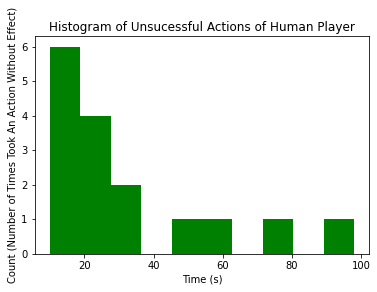

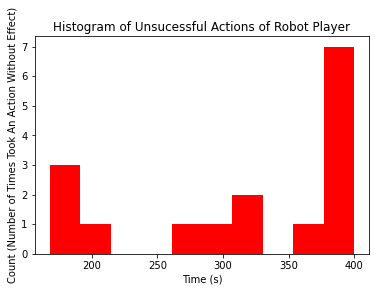

In [73]:
n_human_fails = [work_distribution_data[trial_no]['n_human_fails'] for trial_no in work_distribution_data]
n_robot_fails = [work_distribution_data[trial_no]['n_robot_fails'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()

plt.hist(n_human_fails, alpha=1, bins=10, color='g')
plt.title("Histogram of Unsucessful Actions of Human Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times Took An Action Without Effect)")
# plt.xlim(0,61)
plt.show()

plt.hist(n_robot_fails, alpha=1, bins=10, color='r')
plt.title("Histogram of Unsucessful Actions of Robot Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times Took An Action Without Effect)")
# plt.xlim(0,61)
plt.show()


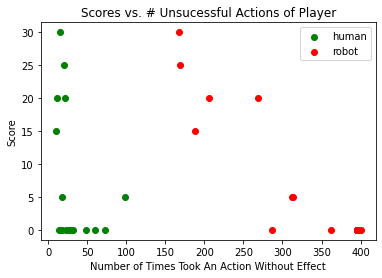

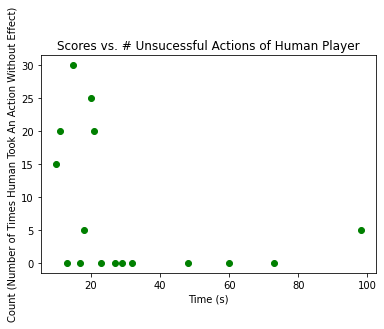

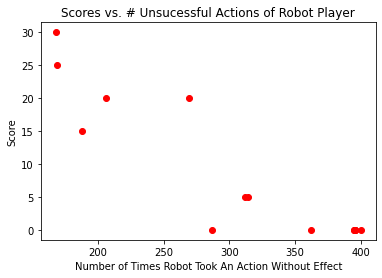

In [84]:
n_human_fails = [work_distribution_data[trial_no]['n_human_fails'] for trial_no in work_distribution_data]
n_robot_fails = [work_distribution_data[trial_no]['n_robot_fails'] for trial_no in work_distribution_data]
scores = [work_distribution_data[trial_no]['score'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()

plt.scatter(n_human_fails, scores, color='g')
plt.scatter(n_robot_fails, scores, color='r')
plt.title("Scores vs. # Unsucessful Actions of Player")
plt.xlabel("Number of Times Took An Action Without Effect")
plt.ylabel("Score")
plt.legend(['human', 'robot'])
# plt.xlim(0,61)
plt.show()



plt.scatter(n_human_fails, scores, color='g')
plt.title("Scores vs. # Unsucessful Actions of Human Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times Human Took An Action Without Effect)")
# plt.xlim(0,61)
plt.show()

plt.scatter(n_robot_fails, scores, color='r')
plt.title("Scores vs. # Unsucessful Actions of Robot Player")
plt.xlabel("Number of Times Robot Took An Action Without Effect")
plt.ylabel("Score")
# plt.xlim(0,61)
plt.show()


# Check Number of Times Getting Stuck

In [87]:
def check_getting_stuck(state_list, next_state_list, human_index, robot_index, human_actions, robot_actions):
    n_human_stuck = 0
    n_robot_stuck = 0
    
    bool_human_stuck = False
    bool_robot_stuck = False
    
    counter_human_stuck = 0
    counter_robot_stuck = 0
    
    for i in range(len(state_list)-1):
        curr_human_state = state_list[i]['players'][human_index]
        curr_robot_state = state_list[i]['players'][robot_index]
        next_human_state = next_state_list[i]['players'][human_index]
        next_robot_state = next_state_list[i]['players'][robot_index]

        check_next_human_state = state_list[i+1]['players'][human_index]
        check_next_robot_state = state_list[i+1]['players'][robot_index]
        assert next_human_state == check_next_human_state
        assert next_robot_state == check_next_robot_state

        human_act = human_actions[i]
        robot_act = robot_actions[i]

        if human_act != [0,0]:

            if next_human_state == curr_human_state:
                if bool_human_stuck == False:
                    n_human_stuck += 1
                    bool_human_stuck = True
                else:
                    counter_human_stuck += 1
                    if counter_human_stuck > 5:
                        n_human_stuck += 1
                        counter_human_stuck  = 0
            else:
                if bool_human_stuck == True:
                    bool_human_stuck = False
                    counter_human_stuck = 0
    #             print('problem with HUMAN')
    #             print('curr_human_state', curr_human_state)
    #             print('next_human_state', next_human_state)
    #             print('human_act', human_act)
    #             print()
        if robot_act != [0,0]:

            if next_robot_state == curr_robot_state:
                if bool_robot_stuck == False:
                    n_robot_stuck += 1
                    bool_robot_stuck = True
                else:
                    counter_robot_stuck += 1
                    if counter_robot_stuck > 5:
                        n_robot_stuck += 1
                        counter_robot_stuck  = 0
            else:
                if bool_robot_stuck == True:
                    bool_robot_stuck = False
                    counter_robot_stuck = 0
    #             print('problem with ROBOT')
    #             print('curr_robot_state', curr_robot_state)
    #             print('next_robot_state', next_robot_state)
    #             print('robot_act', robot_act)
    #             print()

    # print('n_human_fails = ', n_human_fails)
    # print('n_robot_fails = ', n_robot_fails)
    return n_human_stuck, n_robot_stuck



In [88]:
bc_trials = filtered_humanai_trials[(filtered_humanai_trials['model_type'] == 'ppo_bc')&
                                   (filtered_humanai_trials['layout_name'] == 'random0')]
worker_ids = bc_trials['workerid_num'].unique()

work_distribution_data = {}

for trial_no in worker_ids:
    work_distribution_data[trial_no] = {}
    bc_player_trial = bc_trials[bc_trials['workerid_num']==trial_no]
    joint_actions_in_trial = bc_player_trial['joint_action'].to_numpy()
    human_index = bc_player_trial['player_index'].unique()[0]
    time_elapsed_in_trial = bc_player_trial['time_elapsed'].to_numpy()
    scores = bc_player_trial['score'].to_numpy()
    final_score = scores[-1]

    if human_index == 0:
        robot_index = 1
    else:
        robot_index = 0

    human_actions = [elem[human_index] for elem in joint_actions_in_trial]
    robot_actions = [elem[robot_index] for elem in joint_actions_in_trial]
    
    state_list = bc_player_trial['state'].to_numpy()
    next_state_list = bc_player_trial['next_state'].to_numpy()

    n_human_fails, n_robot_fails = check_fails(state_list, next_state_list, human_index, robot_index, human_actions, robot_actions)
    n_human_stuck, n_robot_stuck = check_getting_stuck(state_list, next_state_list, human_index, robot_index, human_actions, robot_actions)
    
    h_num_actions, h_num_stationary, h_time_actions, h_time_stationary = count_actions(human_actions, time_elapsed_in_trial)
    r_num_actions, r_num_stationary, r_time_actions, r_time_stationary = count_actions(robot_actions, time_elapsed_in_trial)

    work_distribution_data[trial_no]['score'] = final_score
    work_distribution_data[trial_no]['h_num_actions'] = h_num_actions
    work_distribution_data[trial_no]['h_num_stationary'] = h_num_stationary
    work_distribution_data[trial_no]['h_time_actions'] = h_time_actions
    work_distribution_data[trial_no]['h_time_stationary'] = h_time_stationary
    work_distribution_data[trial_no]['r_num_actions'] = r_num_actions
    work_distribution_data[trial_no]['r_num_stationary'] = r_num_stationary
    work_distribution_data[trial_no]['r_time_actions'] = r_time_actions
    work_distribution_data[trial_no]['r_time_stationary'] = r_time_stationary
    
    work_distribution_data[trial_no]['n_human_fails'] = n_human_fails
    work_distribution_data[trial_no]['n_robot_fails'] = n_robot_fails
    work_distribution_data[trial_no]['n_human_stuck'] = n_human_stuck
    work_distribution_data[trial_no]['n_robot_stuck'] = n_robot_stuck
    
    


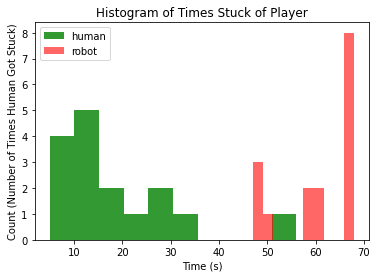

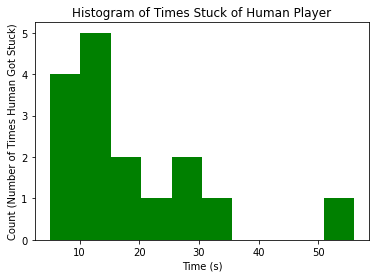

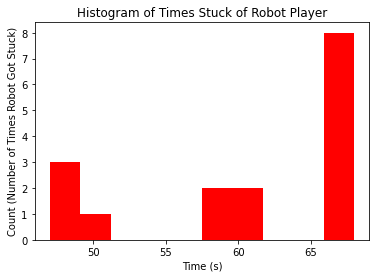

In [89]:
n_human_stuck = [work_distribution_data[trial_no]['n_human_stuck'] for trial_no in work_distribution_data]
n_robot_stuck = [work_distribution_data[trial_no]['n_robot_stuck'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()

plt.hist(n_human_stuck, alpha=0.8, bins=10, color='g', )
plt.hist(n_robot_stuck, alpha=0.6, bins=10, color='r', )
plt.title("Histogram of Times Stuck of Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times Human Got Stuck)")
plt.legend(['human', 'robot'])
# plt.xlim(0,61)
plt.show()



plt.show()


plt.hist(n_human_stuck, alpha=1, bins=10, color='g')
plt.title("Histogram of Times Stuck of Human Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times Human Got Stuck)")
# plt.xlim(0,61)
plt.show()

plt.hist(n_robot_stuck, alpha=1, bins=10, color='r')
plt.title("Histogram of Times Stuck of Robot Player")
plt.xlabel("Time (s)")
plt.ylabel("Count (Number of Times Robot Got Stuck)")
# plt.xlim(0,61)
plt.show()


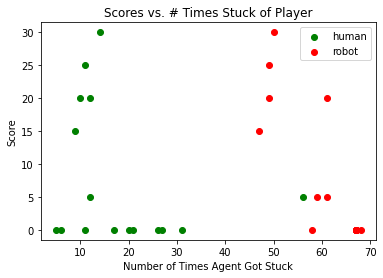

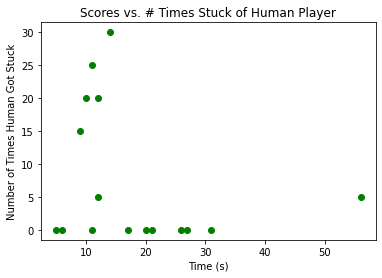

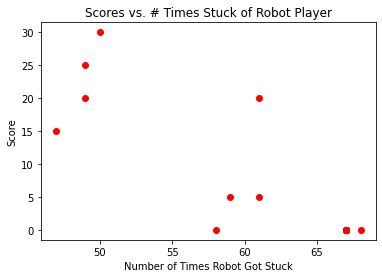

In [90]:
n_human_stuck = [work_distribution_data[trial_no]['n_human_stuck'] for trial_no in work_distribution_data]
n_robot_stuck = [work_distribution_data[trial_no]['n_robot_stuck'] for trial_no in work_distribution_data]
scores = [work_distribution_data[trial_no]['score'] for trial_no in work_distribution_data]

# plt.hist(h_time_actions, alpha=1, bins=5)
# plt.hist(r_time_actions, alpha=1, bins=5)
# plt.legend(['human', 'robot'])
# plt.show()

plt.scatter(n_human_stuck, scores, color='g')
plt.scatter(n_robot_stuck, scores, color='r')
plt.title("Scores vs. # Times Stuck of Player")
plt.xlabel("Number of Times Agent Got Stuck")
plt.ylabel("Score")
plt.legend(['human', 'robot'])
# plt.xlim(0,61)
plt.show()



plt.scatter(n_human_stuck, scores, color='g')
plt.title("Scores vs. # Times Stuck of Human Player")
plt.xlabel("Time (s)")
plt.ylabel("Number of Times Human Got Stuck")
# plt.xlim(0,61)
plt.show()

plt.scatter(n_robot_stuck, scores, color='r')
plt.title("Scores vs. # Times Stuck of Robot Player")
plt.xlabel("Number of Times Robot Got Stuck")
plt.ylabel("Score")
# plt.xlim(0,61)
plt.show()
